# Data Processing

In this notebook we will fill Nan values and drop obvious useless columns

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [3]:
test_df = pd.read_csv('test.csv')
prices_test = pd.read_csv('sample_submission.csv')
test = pd.merge(test_df, prices_test, on='id')
test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,0,0,0,1,10,1,0,14,1,7118500.41
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,1,1,0,2,11,0,1,12,1,7118500.41
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,11,4,0,10,21,0,10,71,11,7118500.41
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,2,0,0,10,0,0,2,0,7118500.41
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,1,1,0,2,12,0,1,11,1,7118500.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,28,1,1,8,39,2,3,75,12,7118500.41
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,2,1,0,0,10,0,0,0,0,7118500.41
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,371,141,26,150,249,2,105,203,13,7118500.41
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,7,2,0,5,11,0,2,43,10,7118500.41


In [4]:
train_size = train.shape[0]
train_size

30471

In [5]:
all_data = train.append(test)
all_data

C:\Users\User\AppData\Local\Temp\ipykernel_11200\543321423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = train.append(test)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43.00,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000.00
1,2,2011-08-23,34.00,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000.00
2,3,2011-08-27,43.00,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000.00
3,4,2011-09-01,89.00,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000.00
4,5,2011-09-05,77.00,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,...,28,1,1,8,39,2,3,75,12,7118500.41
7658,38132,2016-05-28,54.09,NaN,14.0,0.0,1.0,NaN,2.0,0.0,...,2,1,0,0,10,0,0,0,0,7118500.41
7659,38133,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,7118500.41
7660,38134,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,...,7,2,0,5,11,0,2,43,10,7118500.41


## Delete Null values

source: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27

In [6]:
rows = all_data.shape[0]
new_rows = all_data.dropna().shape[0]

In [7]:
print(f"Percent of rows after deleting null values: " + "{:.2f}%".format(new_rows / rows * 100))

Percent of rows after deleting null values: 22.19%


In [8]:
nullValuesCount = all_data.isnull().sum().sort_values(ascending=False)
nullValuesCount = nullValuesCount[nullValuesCount > 0]
nullValuesPercent = nullValuesCount / rows

#### Visualizing

Text(0.5, 1.0, 'Percent of null values in column  (%)')

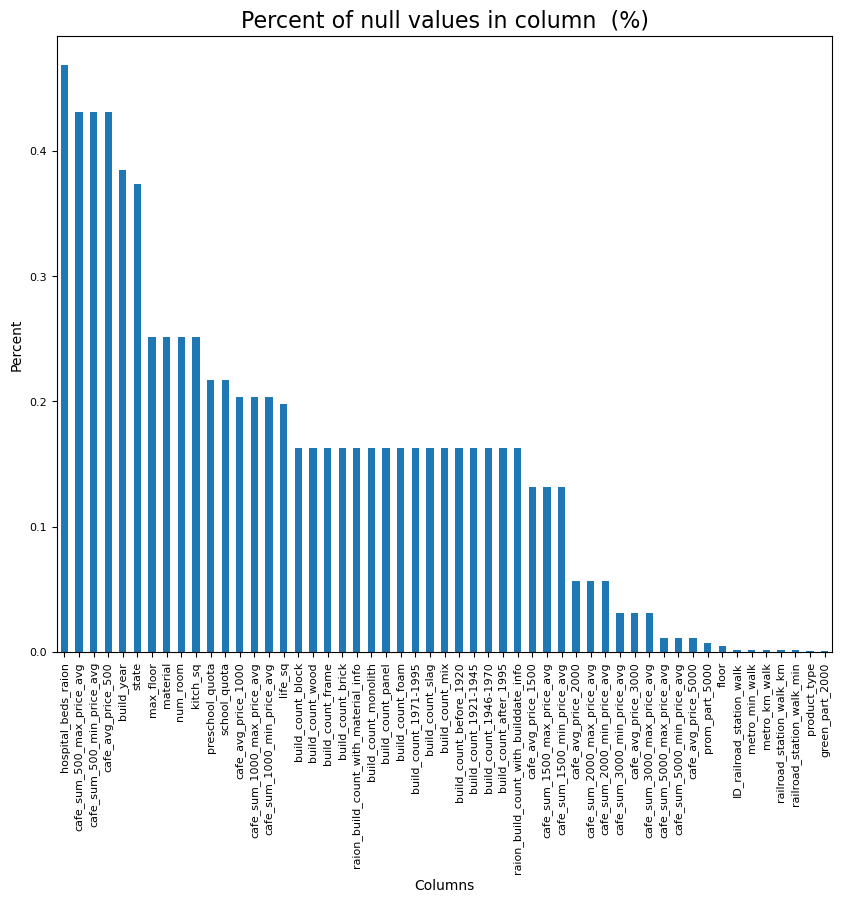

In [9]:
nullValuesPercent.plot(kind="bar", figsize = (10,8), fontsize = 8)
plt.xlabel("Columns", fontsize = 10)
plt.ylabel("Percent", fontsize = 10)
plt.title("Percent of null values in column  (%)", fontsize = 16)

In [10]:
nullValuesPercent

hospital_beds_raion                      0.468335
cafe_sum_500_max_price_avg               0.431123
cafe_sum_500_min_price_avg               0.431123
cafe_avg_price_500                       0.431123
build_year                               0.384287
state                                    0.373771
max_floor                                0.251016
material                                 0.251016
num_room                                 0.251016
kitch_sq                                 0.251016
preschool_quota                          0.217240
school_quota                             0.217135
cafe_avg_price_1000                      0.203131
cafe_sum_1000_max_price_avg              0.203131
cafe_sum_1000_min_price_avg              0.203131
life_sq                                  0.198227
build_count_block                        0.162825
build_count_wood                         0.162825
build_count_frame                        0.162825
build_count_brick                        0.162825


In [11]:
count_uninformative = nullValuesPercent[nullValuesPercent > 0.4]
print(f"Count of uninformative values with a lot of null values: {count_uninformative.shape[0]}")

Count of uninformative values with a lot of null values: 4


In [12]:
all_data.drop(columns=count_uninformative.index, axis=1, inplace=True)

In [13]:
all_data.shape

(38133, 288)

In [14]:
def fill_nulls(df, columns):
    for column in columns:
        column_type = df[column].dtype 
        if column_type == 'object':
            df[column].fillna('unknown', inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

In [15]:
columns = nullValuesPercent.index[4:]
columns

Index(['build_year', 'state', 'max_floor', 'material', 'num_room', 'kitch_sq',
       'preschool_quota', 'school_quota', 'cafe_avg_price_1000',
       'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg', 'life_sq',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'raion_build_count_with_material_info',
       'build_count_monolith', 'build_count_panel', 'build_count_foam',
       'build_count_1971-1995', 'build_count_slag', 'build_count_mix',
       'build_count_before_1920', 'build_count_1921-1945',
       'build_count_1946-1970', 'build_count_after_1995',
       'raion_build_count_with_builddate_info', 'cafe_avg_price_1500',
       'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg',
       'cafe_avg_price_2000', 'cafe_sum_2000_max_price_avg',
       'cafe_sum_2000_min_price_avg', 'cafe_sum_3000_min_price_avg',
       'cafe_avg_price_3000', 'cafe_sum_3000_max_price_avg',
       'cafe_sum_5000_max_price_avg', 'cafe_sum_

In [16]:
all_data = fill_nulls(all_data,columns)
all_data.isnull().sum().sum()

0

## Drop usless columns

In [17]:
all_data.drop(columns=['id'], inplace=True)

## Write in csv

In [18]:
all_data.to_csv('../2_step/sample.csv', sep=';', index=False)